In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('https://github.com/DeepakJuluru/stock_price_prediction/raw/main/Stock_Price_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [12]:
df = df[['Date','Open','Close']]
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0]))
df.set_index('Date',drop=True,inplace=True)
df.head()

,Open,Close
Date,,
2018-02-05,262.000000,254.259995
2018-02-06,247.699997,265.720001
2018-02-07,266.579987,264.559998
2018-02-08,267.079987,250.100006
2018-02-09,253.850006,249.470001


<ipython-input-13-456cf76c3240>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


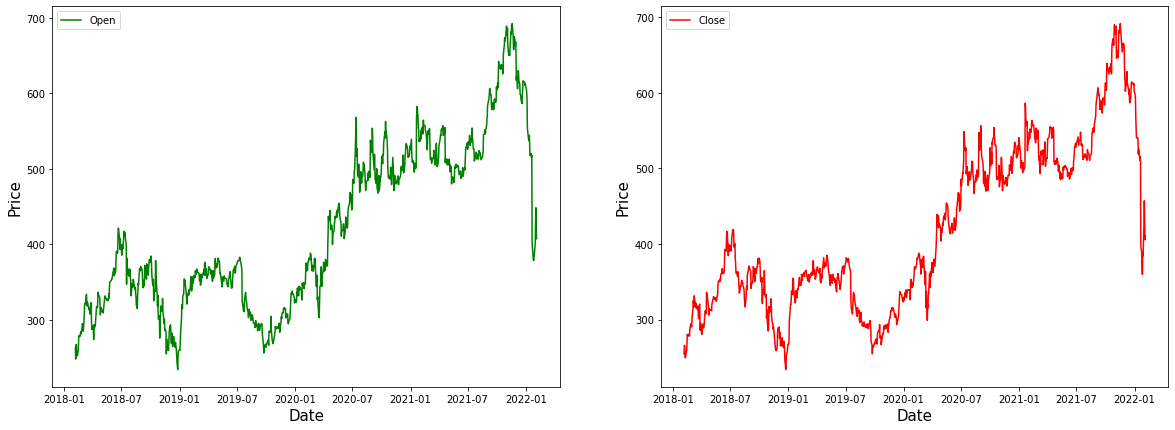

In [13]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)

In [15]:
df.shape

(1009, 2)

In [16]:
training_size = round(len(df) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

807

In [17]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((807, 2), (202, 2))

In [31]:
def create_sequence(dataset):
   sequences = []
   labels = []

   start_idx = 0

   for stop_idx in range(50,len(dataset)):
       sequences.append(dataset.iloc[start_idx:stop_idx])
       labels.append(dataset.iloc[stop_idx])
       start_idx += 1
   return (np.array(sequences),np.array(labels))

In [32]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [33]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((757, 50, 2), (757, 2), (152, 50, 2), (152, 2))

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [35]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
24/24 [==============================] - 6s 80ms/step - loss: 0.0309 - mean_absolute_error: 0.1247 - val_loss: 0.0436 - val_mean_absolute_error: 0.1877
Epoch 2/80
24/24 [==============================] - 1s 38ms/step - loss: 0.0039 - mean_absolute_error: 0.0485 - val_loss: 0.0110 - val_mean_absolute_error: 0.0809
Epoch 3/80
24/24 [==============================] - 1s 39ms/step - loss: 0.0024 - mean_absolute_error: 0.0380 - val_loss: 0.0084 - val_mean_absolute_error: 0.0615
Epoch 4/80
24/24 [==============================] - 1s 38ms/step - loss: 0.0023 - mean_absolute_error: 0.0364 - val_loss: 0.0077 - val_mean_absolute_error: 0.0627
Epoch 5/80
24/24 [==============================] - 1s 39ms/step - loss: 0.0022 - mean_absolute_error: 0.0360 - val_loss: 0.0074 - val_mean_absolute_error: 0.0569
Epoch 6/80
24/24 [==============================] - 1s 41ms/step - loss: 0.0022 - mean_absolute_error: 0.0357 - val_loss: 0.0064 - val_mean_absolute_error: 0.0551
Epoch 7/80
24/24 [====

24/24 [==============================] - 1s 38ms/step - loss: 6.9301e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0019 - val_mean_absolute_error: 0.0311
Epoch 51/80
24/24 [==============================] - 1s 39ms/step - loss: 6.7793e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0016 - val_mean_absolute_error: 0.0258
Epoch 52/80
24/24 [==============================] - 1s 39ms/step - loss: 6.7050e-04 - mean_absolute_error: 0.0190 - val_loss: 0.0023 - val_mean_absolute_error: 0.0355
Epoch 53/80
24/24 [==============================] - 1s 38ms/step - loss: 6.6308e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0017 - val_mean_absolute_error: 0.0279
Epoch 54/80
24/24 [==============================] - 1s 39ms/step - loss: 7.3574e-04 - mean_absolute_error: 0.0200 - val_loss: 0.0024 - val_mean_absolute_error: 0.0368
Epoch 55/80
24/24 [==============================] - 1s 39ms/step - loss: 6.7910e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0015 - val_mean_absolute_error: 0.0245
Epoc

In [37]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

5/5 [==============================] - 1s 16ms/step


array([[0.66518635, 0.6698692 ],
       [0.66692764, 0.6712995 ],
       [0.6780614 , 0.6820016 ],
       [0.6858322 , 0.68965435],
       [0.68640107, 0.69063985]], dtype=float32)

In [39]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[538.8613 , 540.55286],
       [539.6596 , 541.20764],
       [544.7637 , 546.1072 ],
       [548.326  , 549.61066],
       [548.5868 , 550.0618 ]], dtype=float32)

In [40]:
gs_slic_data = pd.concat([df.iloc[-152:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=df.iloc[-152:].index)], axis=1)

In [43]:
gs_slic_data[['Open','Close']] = MMS.inverse_transform(gs_slic_data[['Open','Close']])

In [44]:
gs_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-07-01,525.719971,533.539978,538.861328,540.552856
2021-07-02,535.500000,533.979980,539.659607,541.207642
2021-07-06,533.000000,541.640015,544.763672,546.107178
2021-07-07,544.239990,535.960022,548.325989,549.610657
2021-07-08,530.929993,530.760010,548.586792,550.061829


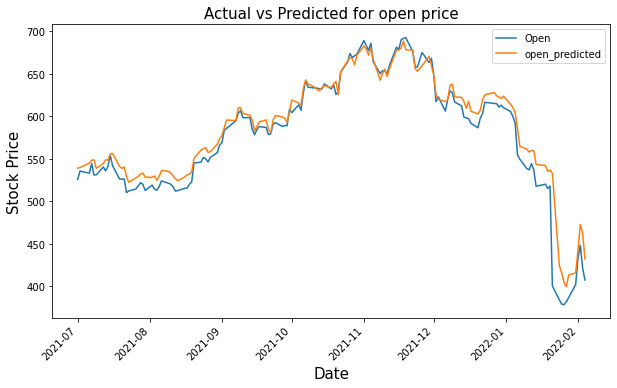

In [45]:
gs_slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

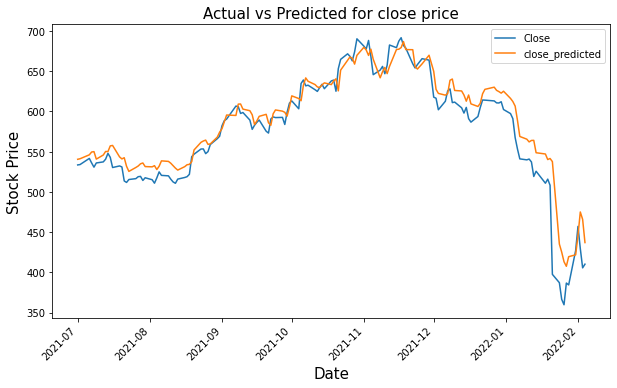

In [46]:
gs_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [47]:
gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))

In [48]:
df.tail(10)

,Open,Close
Date,,
2022-01-24,0.327182,0.334790
2022-01-25,0.316777,0.289509
2022-01-26,0.314879,0.274830
2022-01-27,0.323146,0.333807
2022-01-28,0.333399,0.328695
2022-01-31,0.366577,0.422140
2022-02-01,0.434178,0.487648
2022-02-02,0.467531,0.427251
2022-02-03,0.409048,0.375090


In [49]:
gs_slic_data['2022-02-05	':'2022-02-15']

,Open,Close,open_predicted,close_predicted
2022-02-05,NaN,NaN,NaN,NaN
2022-02-06,NaN,NaN,NaN,NaN
2022-02-07,NaN,NaN,NaN,NaN
2022-02-08,NaN,NaN,NaN,NaN
2022-02-09,NaN,NaN,NaN,NaN
2022-02-10,NaN,NaN,NaN,NaN
2022-02-11,NaN,NaN,NaN,NaN
2022-02-12,NaN,NaN,NaN,NaN
2022-02-13,NaN,NaN,NaN,NaN
2022-02-14,NaN,NaN,NaN,NaN


In [72]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [73]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 40ms/step


In [74]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

<ipython-input-76-70394ed6885f>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


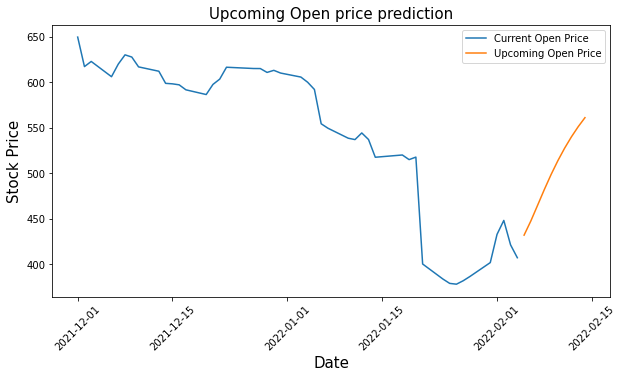

In [76]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-12-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-12-01':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

<ipython-input-77-8a635e75ee06>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


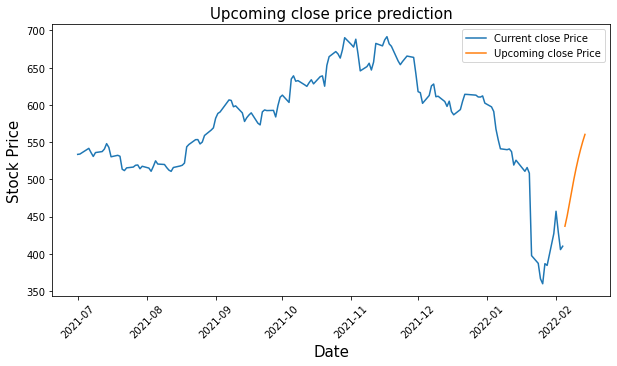

In [77]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()